# Introduction to deep learning

In [2]:
img_path = 'images/'
csv_path = 'csv_files/'
from IPython.display import Image

Deep learning is used to make predictions. Let's assume we would like to predict how many transactions an individual does in the next year. We could make a linear model which contains features we apply linear regression and individually apply it to the model.

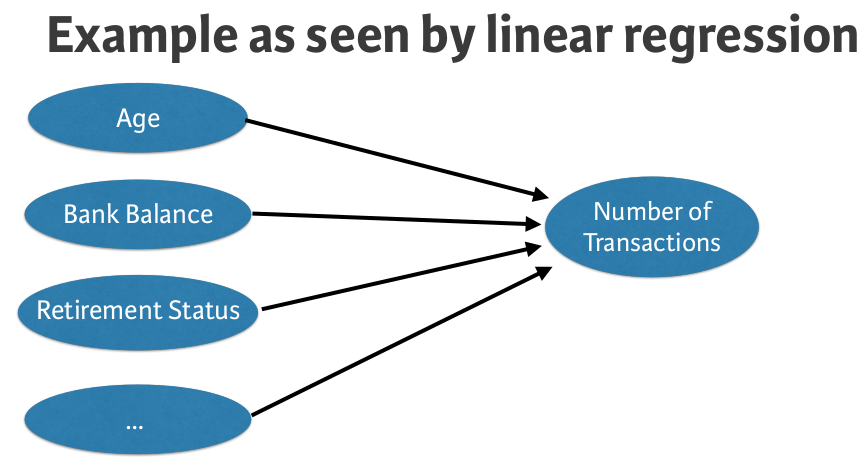

In [2]:
Image(img_path + 'linreg.png')

In ordinary linear regression we assume that there are no interactions between the features but we could also mae a model where these interactions occur. And clearly the results vary in such a way.

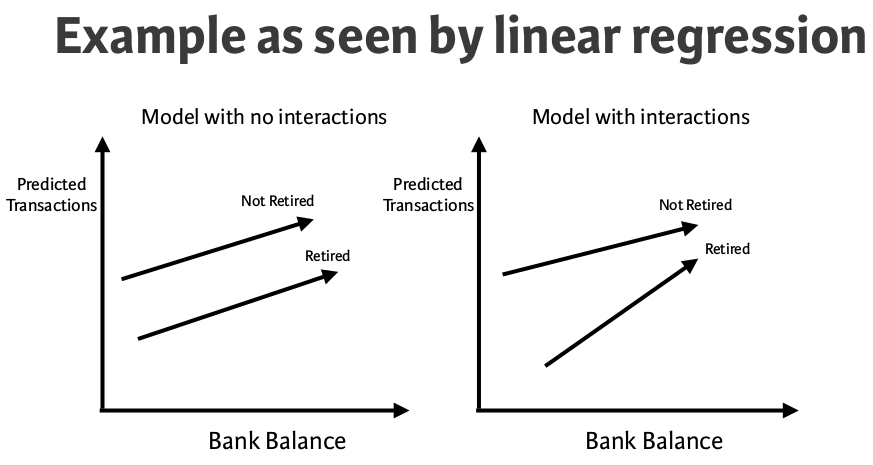

In [3]:
Image(img_path + 'linreg_examp.png')

### Interactions
- Neural networks account for interactions really well
- Deep learning uses especially powerful neural networks
	- Text
	- Images
	- Videos
	- Audio
	- Source code

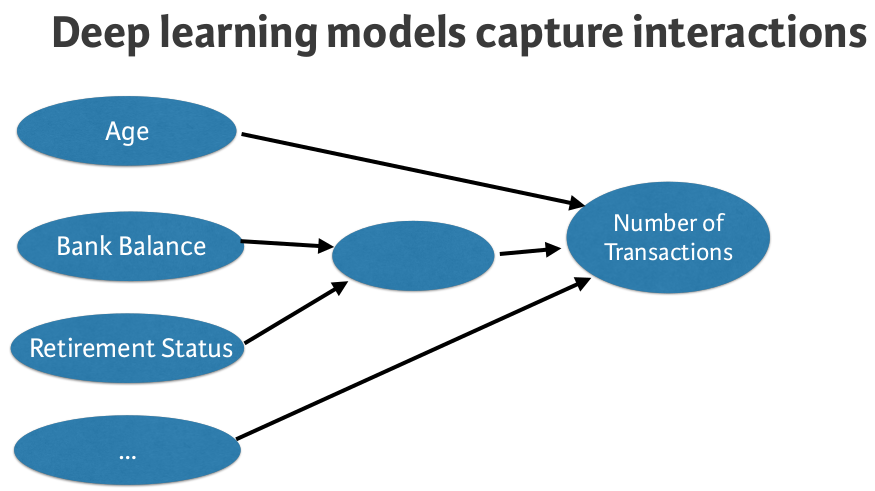

In [4]:
Image(img_path + 'interactions.png')

#### Input Layer:
- predictive features (age, income)
#### Output Layer:
- the predictions of our model
#### Hidden Layer:
- layers that are nor input or output. Hidden layers are in essence the interaction layers. Each dot called 'node' in the hidden layer represents an aggregation of information from our input data and each node adds the model the ability to capture interactions. The more nodes we have, the more interactions we capture.


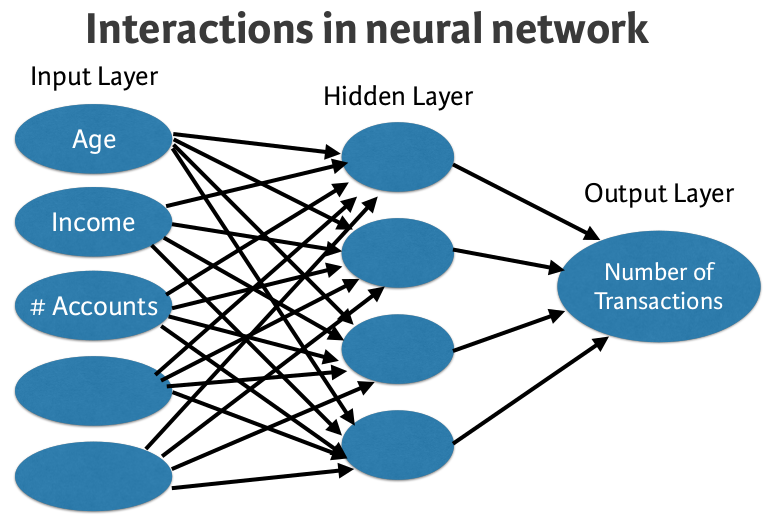

In [5]:
Image(img_path + 'neuraln.png')

## Forward propagation (algorithm)

__Forward propagation__ - How neural network models use data to make predictions

Number of bank transactions example:
- For simplicity lets use only two inputs: number of children and number of accounts each user has
- Lines connect the inputs to the hidden layer
- Each line is given a __weight__ (how strongly the input affects the hidden layer node the line ends at)

To make predictions for the top node of the hidden layer, we take a value of each node in the input layer, multiply it by the weight that ends that node and then sum up all these values. In the example below we get 2x1 + 3x1 = 5 and 2x(-1) + 3x1 = 1. Then the process is repeated for the next layer: 5x2 + 1x(-1) = 9.

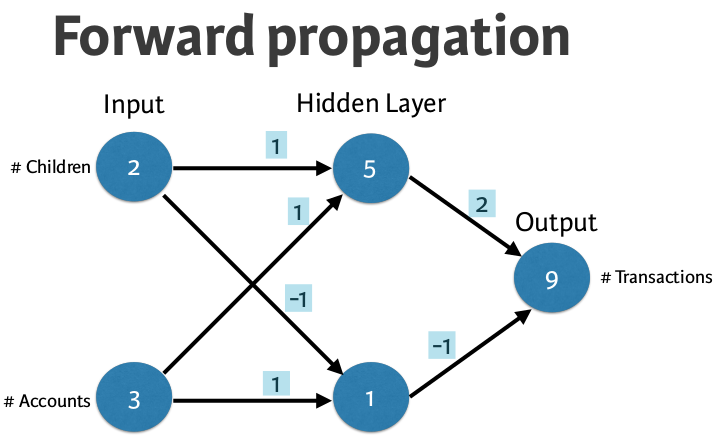

In [6]:
Image(img_path + 'fprop.png')

In [7]:
# Forward propagation code

import numpy as np

input_data = np.array([2, 3])
print('Input values: {}'.format(input_data))

weights = {'node_0': np.array([1, 1]),
           'node_1': np.array([-1, 1]),
           'output': np.array([2, -1])}

node_0_value = (input_data * weights['node_0']).sum()
node_1_value = (input_data * weights['node_1']).sum()

hidden_layer_values = np.array([node_0_value, node_1_value])
print('\nHidden layer values: {}'.format(hidden_layer_values.reshape(2,1)))

output = (hidden_layer_values * weights['output']).sum()
print('\nOutput: {}'.format(output))

Input values: [2 3]

Hidden layer values: [[5]
 [1]]

Output: 9


## EXERCISE
###Coding the forward propagation algorithm

In this exercise, you'll write code to do forward propagation (prediction) for your first neural network:

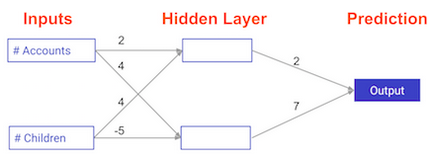

In [8]:
Image(img_path + 'firstn.png')

Each data point is a customer. The first input is how many accounts they have, and the second input is how many children they have. The model will predict how many transactions the user makes in the next year. You will use this data throughout the first 2 chapters of this course. 

In [9]:
input_data = np.array([3, 5])
print('Input data: {}'.format(input_data))

weights = {'node_0': np.array([2, 4]),
           'node_1': np.array([4, -5]),
           'output': np.array([2, 7])}

hidden_layer_values = np.array([(input_data * weights['node_0']).sum(),
                                (input_data * weights['node_1']).sum()])

print('\nHidden layer values: {}'.format(hidden_layer_values))

output = (hidden_layer_values * weights['output']).sum()
print('\nOutput value: {}'.format(output))

def end():
    print('\nEND of EXERCISE!!!')
end()

Input data: [3 5]

Hidden layer values: [ 26 -13]

Output value: -39

END of EXERCISE!!!


### Activation functions

Activation functions allow to capture nonlinear trends in the hidden layer. 

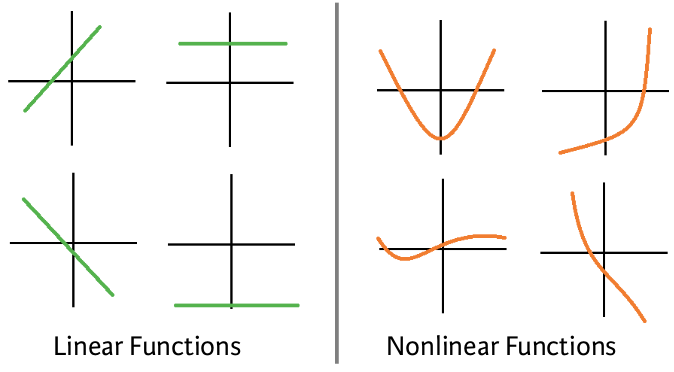

In [10]:
Image(img_path + 'nonlin.png')

Activation functions are applied to node inputs to produce node output. One of the activation functions that is applied today is ReLU (Rectified Linear Activation):

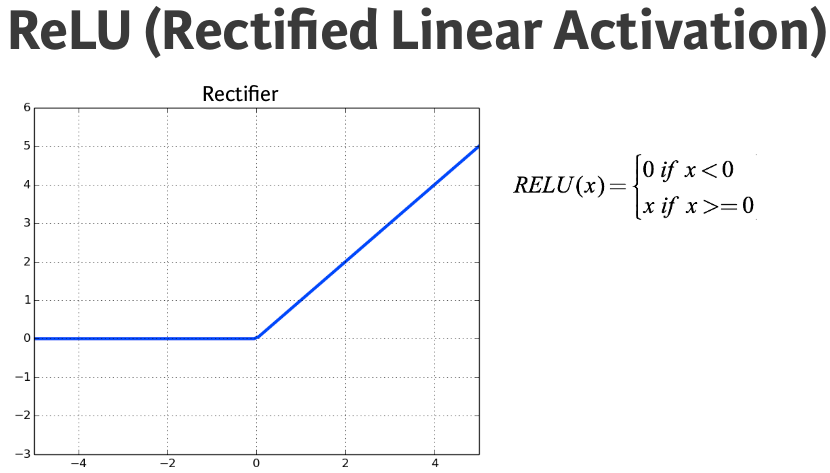

In [11]:
Image(img_path + 'ReLU.png')

## EXERCISE
###The Rectified Linear Activation Function

As Dan explained to you in the video, an "activation function" is a function applied at each node. It converts the node's input into some output.

The rectified linear activation function (called ReLU) has been shown to lead to very high-performance networks. This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive. 

Here are some examples:
- relu(3) = 3
- relu(-3) = 0

In [12]:
input_data = np.array([3, 5])

weights = {'node_0': np.array([2, 4]), 
           'node_1': np.array([ 4, -5]), 
           'output': np.array([2, 7])}

def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(input, 0)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print('{} transactions'.format(model_output))

end()

52 transactions

END of EXERCISE!!!


 You predicted 52 transactions. Without this activation function, you would have predicted a negative number! The real power of activation functions will come soon when you start tuning model weights.

## EXERCISE
###Applying the network to many observations/rows of data

You'll now define a function called predict_with_network() which will generate predictions for multiple data observations, which are pre-loaded as input_data. As before, weights are also pre-loaded. In addition, the relu() function you defined in the previous exercise has been pre-loaded.

In [13]:
input_data = np.array([[3, 5], [1, -1], [0, 0], [8, 4]])

weights = {'node_0': np.array([2, 4]), 
           'node_1': np.array([4, -5]), 
           'output': np.array([2, 7])}

In [14]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)

In [15]:
# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)

end()

[52, 63, 0, 148]

END of EXERCISE!!!


## Deeper networks

Multiple hidden layers

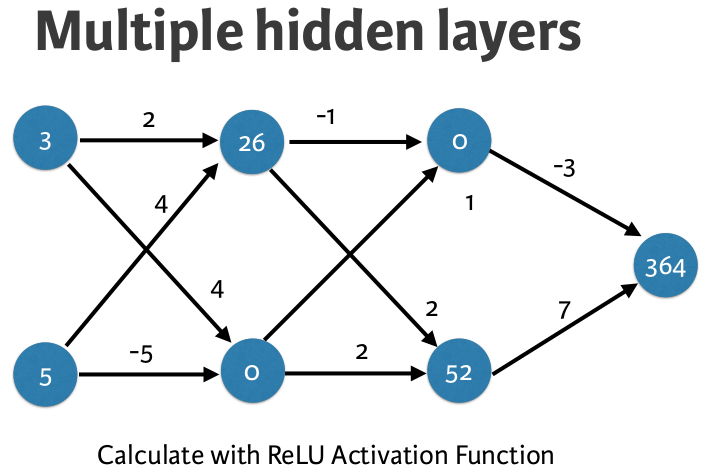

In [16]:
Image(img_path + 'multih.png')

In [17]:
a = [x for x in range(0,1)]
print(a)

[0]


In [18]:
input_data = np.array([3, 5])

weights = {'h0_n0': np.array([2, 4]),
           'h0_n1': np.array([4, -5]),
           'h1_n0': np.array([-1, 1]),
           'h1_n1': np.array([2, 2]),
           'output': np.array([-3, 7])}

results = []

h0_nodes = [relu((input_data * weights['h0_n0']).sum()), 
            relu((input_data * weights['h0_n1']).sum())]

results.append(h0_nodes)

h1_nodes = [relu((h0_nodes * weights['h1_n0']).sum()), 
            relu((h0_nodes * weights['h1_n1']).sum())]

results.append(h1_nodes)

output = relu((h1_nodes * weights['output']).sum())
results.append(output)

print(results)

[[26, 0], [0, 52], 364]


## EXERCISE

###Multi-layer neural networks

In this exercise, you'll write code to do forward propagation for a neural network with 2 hidden layers. Each hidden layer has two nodes. The input data has been preloaded as input_data. The nodes in the first hidden layer are called node_0_0 and node_0_1. Their weights are pre-loaded as weights['node_0_0'] and weights['node_0_1'] respectively.

The nodes in the second hidden layer are called node_1_0 and node_1_1. Their weights are pre-loaded as weights['node_1_0'] and weights['node_1_1'] respectively.

We then create a model output from the hidden nodes using weights pre-loaded as weights['output'].

In [19]:
input_data = np.array([3, 5])

weights = {'node_0_0': np.array([2, 4]),
           'node_0_1': np.array([4, -5]),
           'node_1_0': np.array([-1,  2]),
           'node_1_1': np.array([1, 2]),
           'output': np.array([2, 7])}

# #def predict_with_network(input_data):
#     # Calculate node 0 in the first hidden layer
#     node_0_0_input = (input_data * weights['node_0_0']).sum()
#     node_0_0_output = relu(node_0_0_input)
# 
#     # Calculate node 1 in the first hidden layer
#     node_0_1_input = (input_data * weights['node_0_1']).sum()
#     node_0_1_output = relu(node_0_1_input)
# 
#     # Put node values into array: hidden_0_outputs
#     hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
#     
#     # Calculate node 0 in the second hidden layer
#     node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
#     node_1_0_output = relu(node_1_0_input)
# 
#     # Calculate node 1 in the second hidden layer
#     node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
#     node_1_1_output = relu(node_1_1_input)
# 
#     # Put node values into array: hidden_1_outputs
#     hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])
# 
#     # Calculate model output: model_output
#     model_output = (hidden_1_outputs * weights['output']).sum()
#     
#     # Return model_output
#     return(model_output)
# 
# output = predict_with_network(input_data)
# print(output)

## The need for optimization

The more data points we have the harder is the prediction to be right. At any set of weights there are many values of error. We need a loss function to measure models predictive performance. Squared error loss function is one of those:

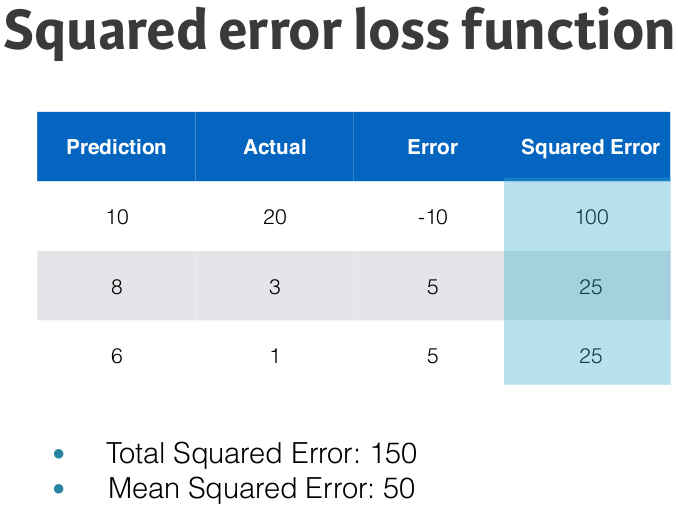

In [20]:
Image(img_path + 'sqerror.png')

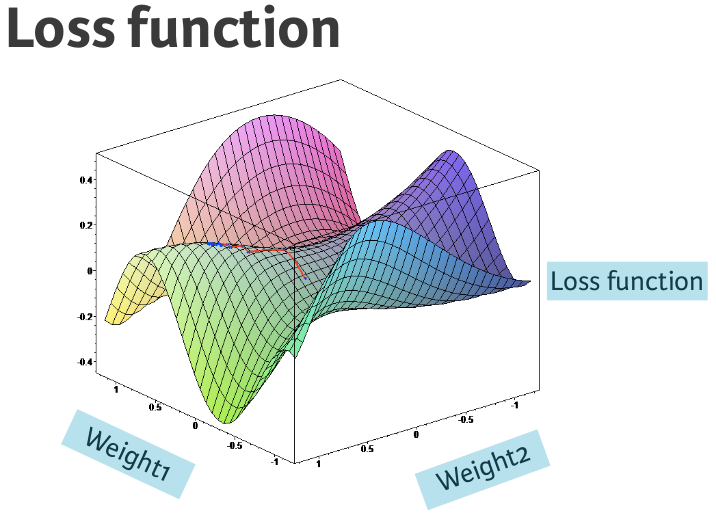

In [21]:
# loss function graphically
Image(img_path + 'lossg.png')

###Loss function
- Lower loss function value means a be!er model
- Goal: Find the weights that give the lowest value for the loss function
- One possible algorithms __Gradient descent__

###Gradient descent works
- Imagine you are in a pitch dark field
- Want to find the lowest point
- Feel the ground to see how it slopes
- Take a small step downhill
- Repeat until it is uphill in every direction

###Gradient descent steps
- Start at random point
- Until you are somewhere flat:
	- Find the slope
	- Take a step downhill

Optimizing a single weight:

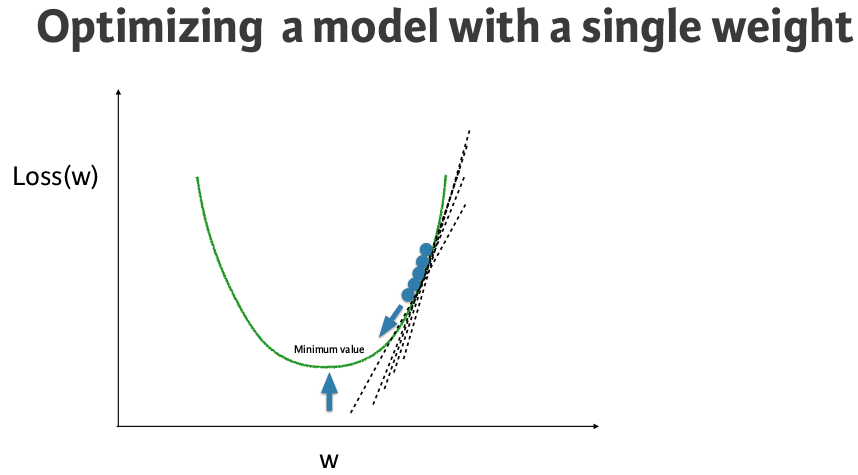

In [22]:
Image(img_path + 'lossf.png')

We are looking for a lowpoint of the (green) curve to find the optimal weight for the loss function to be at minimum. Therefore our model is as accurate as possible. The tangent lines at given point gives the slope of the loss function at our current weight. Here the slope is positive and therefore moving toward smaller slope.

## EXERCISE

In [23]:
weights_0 = {'node_0': np.array([2, 1]), 
             'node_1': np.array([1, 2]), 
             'output': np.array([1, 1])}

weights_1 = {'node_0': np.array([2, 1]),
             'node_1': np.array([1., 1.5]),
             'output': np.array([1., 1.5])}

input_data = [np.array([0, 3]), 
              np.array([1, 2]), 
              np.array([-1, -2]), 
              np.array([4, 0])]

target_actuals = [1, 3, 5, 7]

###Scaling up to multiple data points

You've seen how different weights will have different accuracies on a single prediction. But usually, you'll want to measure model accuracy on many points. You'll now write code to compare model accuracies for two different sets of weights, which have been stored as weights_0 and weights_1.

input_data is a list of arrays. Each item in that list contains the data to make a single prediction. target_actuals is a list of numbers. Each item in that list is the actual value we are trying to predict.

In this exercise, you'll use the mean_squared_error() function from sklearn.metrics. It takes the true values and the predicted values as arguments.

You'll also use the preloaded predict_with_network() function, which takes an array of data as the first argument, and weights as the second argument.

In [7]:
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

end()

NameError: name 'predict_with_network' is not defined

### Gradient decent
-If the slope is positive:
	- Going opposite the slope means moving to lower numbers
	- Subtract the slope from the current value
	- Too big a step might lead us astray
-Solution: learning rate
-Update each weight by subtracting __learning rate * slope__

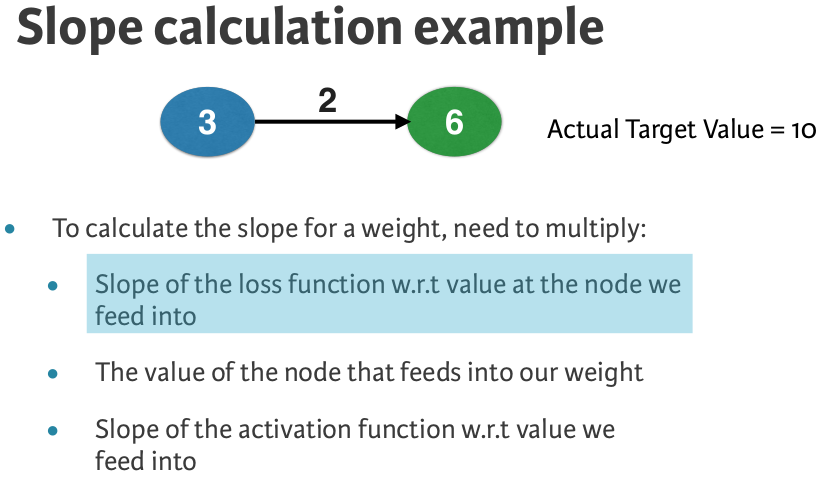

In [25]:
Image(img_path + 'slope1.png')

Here 6 is the node value we are feeding the loss function into.

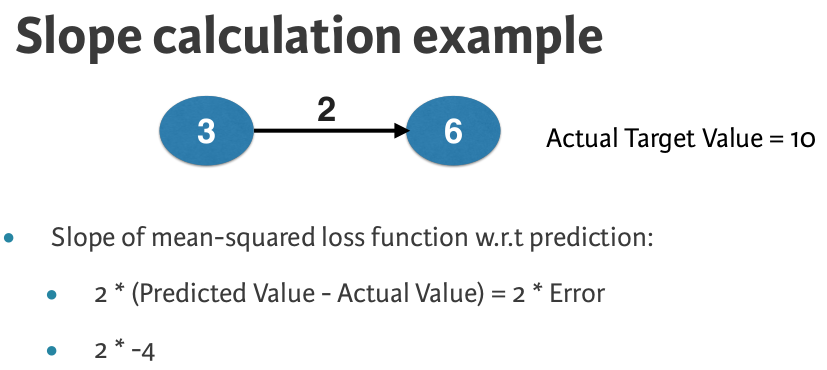

In [3]:
Image(img_path + 'slope2.png')

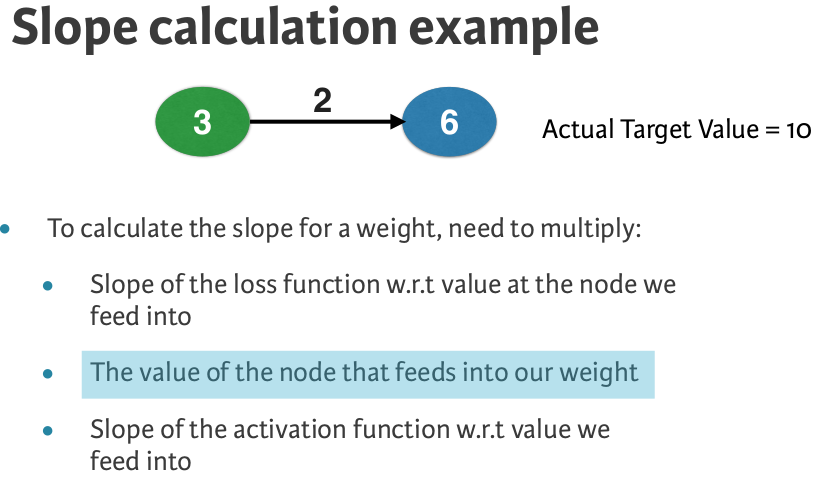

In [27]:
Image(img_path + 'slope3.png')

Since we do not have the activation function here we discard it at the moment. 

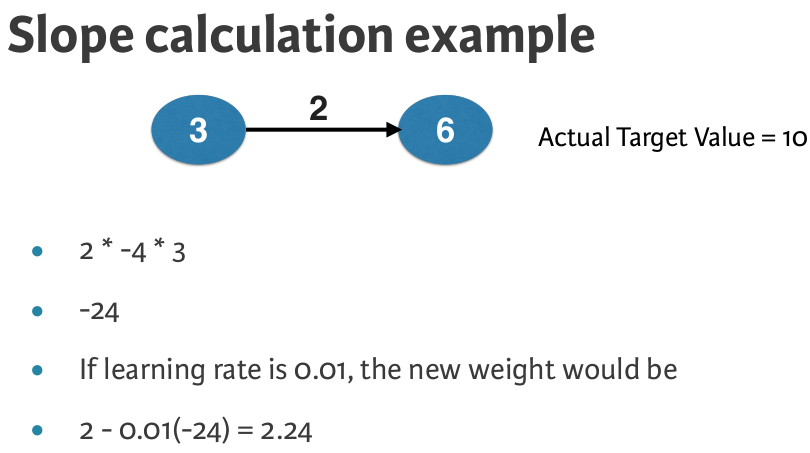

In [28]:
Image(img_path + 'slope4.png')

Lets examine simple system and try to update their weights simultaneously:

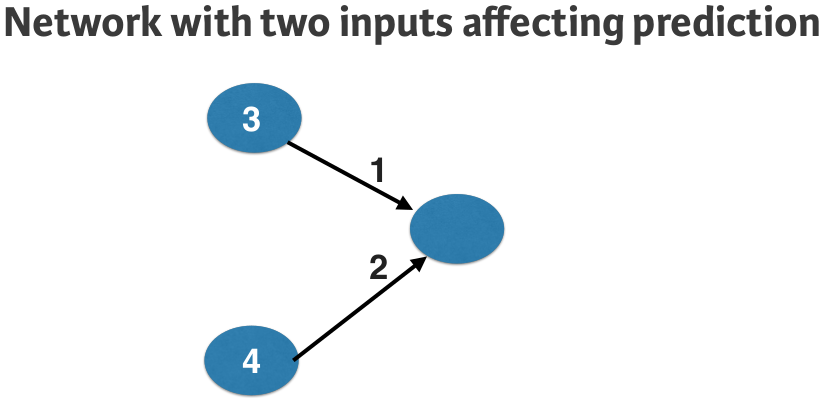

In [29]:
Image(img_path + 'slope5.png')

In [30]:
weights = np.array([1, 2])
input_data = np.array([3, 4])

target = 6

learning_rate = 0.01

preds = (weights * input_data).sum()

error = preds - target

print(error)

5


In [31]:
# slope calculation
gradient = 2 * error * input_data
print(gradient)

[30 40]


In [32]:
weights_updated = weights - learning_rate * gradient

preds_updated = (weights_updated * input_data).sum()

error_updated = preds_updated - target

print(error_updated)

2.5


## EXERCISE
###Making multiple updates to weights

You're now going to make multiple updates so you can dramatically improve your model weights, and see how the predictions improve with each update.

To keep your code clean, there is a pre-loaded get_slope() function that takes input_data, target, and weights as arguments. There is also a get_mse() function that takes the same arguments. The input_data, target, and weights have been pre-loaded.

This network does not have any hidden layers, and it goes directly from the input (with 3 nodes) to an output node. Note that weights is a single array.

We have also pre-loaded matplotlib.pyplot, and the error history will be plotted after you have done your gradient descent steps.

In [5]:
import numpy as np
input_data  = np.array([1, 2, 3])
target = 0
weights = np.array([0, 2, 1])

In [6]:
def get_gradient(input_data, target, weights): 
    '''Returns the slope/gradient of the input data.'''
    
    # Prediction for error calculation
    preds = (weights * input_data).sum()
    error = preds - target
    # calculate the slope/gradient
    gradient = 2 * error * input_data
    return gradient

In [8]:
def get_mse(input_data, target, weights):
    ''''Returns the mean squre error of input_data via
    predict_with_network function'''
    
    model_output = np.array([(input_data * weights).sum()])
    
    mse = mean_squared_error(np.array([target]), model_output)
    
    return mse

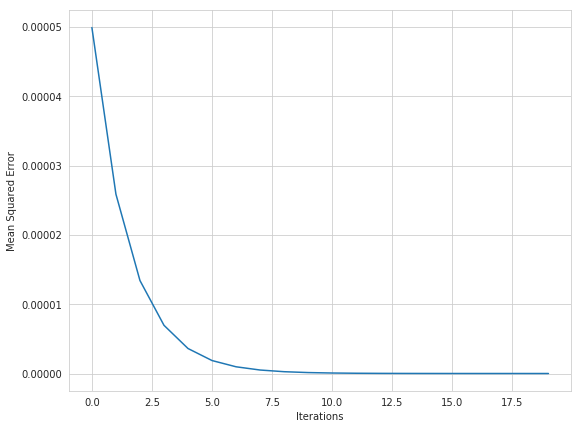

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_gradient(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
sns.set_style('whitegrid')
plt.figure(figsize=[9,7])
plt.plot(range(n_updates), mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

As you can see, the mean squared error decreases as the number of iterations go up.

## Backpropagation

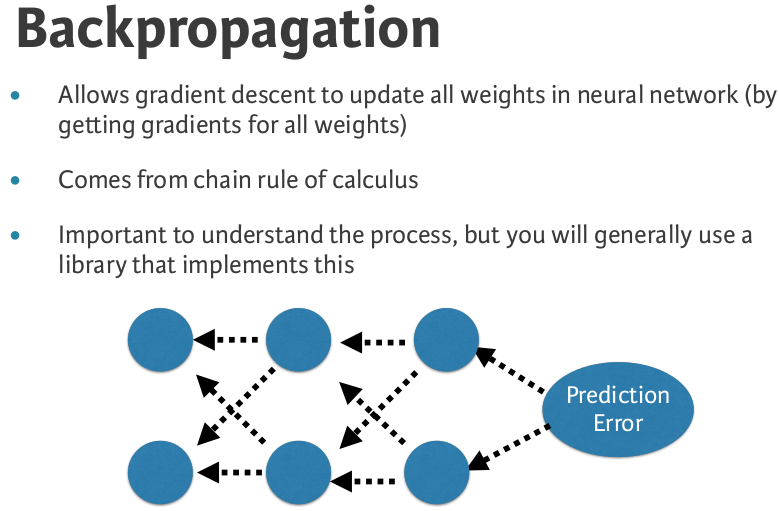

In [37]:
Image(img_path + 'backpropa.png')

### Backpropagation process

-Trying to estimate the slope of the loss function w.r.t each weight
-Before doing backpropagation a forward propagation is always done before, to calculate predictions and erros

#### Backpropagation process:
- Go back (toward input layer) one layer at a time
- Gradients for weight is product of:
	1. Node value feeding into that weight (output node for the first)
	2. Slope of loss function w.r.t node it feeds into
	3. Slope of activation function at the node it feeds into

With ReLU activation function the slope of the activation function is 0 if the node value is negative and 1 if it is positive. 

- Need to also keep track of the slopes of the loss function w.r.t node values
- Slope of node values are the sum of the slopes for all weights that come out of them

<font color='green'>__Each time you generate predictions using forward propagation, you update the weights using backward propagation!__</font>

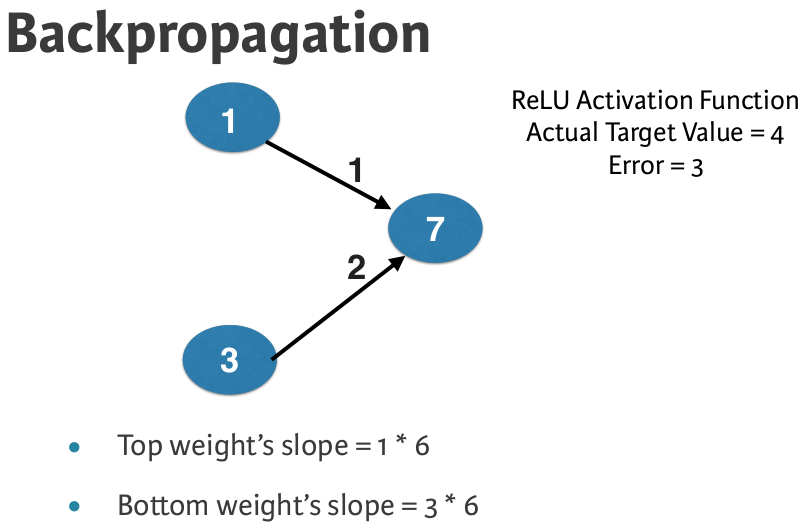

In [38]:
Image(img_path + 'backp.png')

The slopes we just calculated (6 for top and 18 for bottom) feed into the formula associated with weights further back in the network. Lets do the calculation one layer back now.

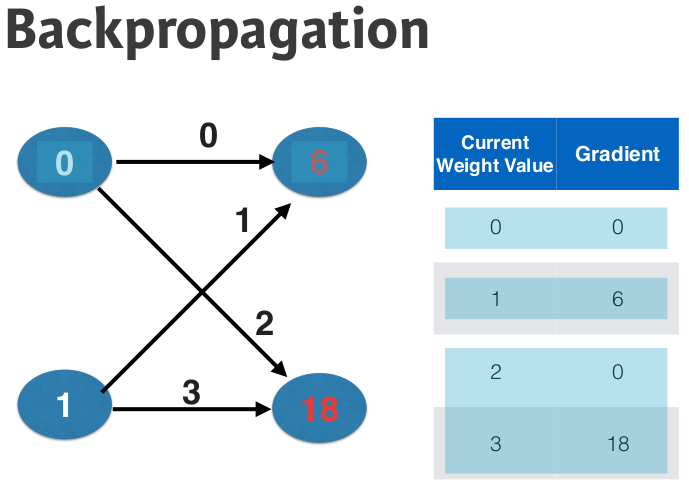

In [39]:
Image(img_path + 'gradcalc.png')

We can now multiply the calculated gradients (slopes) with learning rate and subtract this value from initial weights to update the weight values.

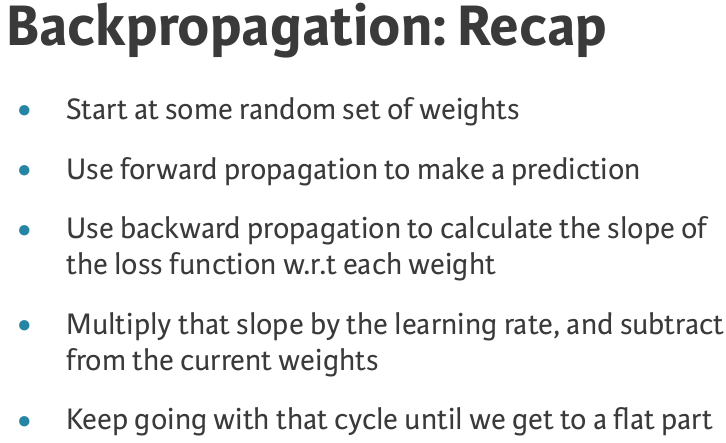

In [40]:
Image(img_path + 'recap.png')

### Stochastic gradient decent

- For computational efficiency its common to calculate slopes on only a subset o teh data ('batch') for each update of the weights.
- Use a different batch of data to calculate the next update
- Start over from the beginning once all the data is used 
- Each time through the training data is called an __epoch__
- When slopes are calculated on one epoch at the time: Stochastic gradient descent


# Creating a keras model

### Model building steps
1. Specify __architecture__ (how many layers, nodes, which activation function to use each layer)
2. __Compile__ the model (specifies the loss function and details about how optimization works)
3. __Fit__ the model (cycle of backpropagation and optimization of model weights with the data)
4. __Predict__


### Specifying model (architecture)
### Regression model

In [5]:
import tensorflow
import keras
import numpy as np
from sklearn import datasets
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# reading the data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# specifying number of input nodes
n_cols = X.shape[1]

# building the model. Sequential is one of 2 possible ways to build a model and the easier one.
# Sequential models require that each layer has weights (connections) only to the one layer coming
# directly after it in the network diagram 
model = Sequential()

# start adding layers with the .add() method. Standard layer type is called Dense layer. Its
# called dense because all the nodes of the previous layer connect to all of the nodes in the 
# current layer. In each layer we specify the number of nodes (first positional argument). 
# Also activation argument. In the first layer we need to specify the input shape that sais that
# the input has n_cols columns and tehres nothing after the comma, meaning it can have any number of rows 
# that is any number of data points.
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))

model.add(Dense(100, activation='relu'))

# the last layer has only one node (output layer) 
model.add(Dense(1))

# the model has 2 hidden layers and an output layer 

### Compile and fit a model

The next step is to complie the model, which sets up the network for optimization, for instance creating an internal function to backpropagation efficiently. The compile method has 2 different arguments to choose:

1. Speficy the optimizer 
	- controls the learning rate 
In practice, the right choice of learning rate can make big difference for how quickly our model finds good weights and even how good set of weights it can find. There are a few algorithms that automatically tune the learning rate. Pragmatic choice is to use versatile algorithm and use that for most problems. 'Adam' is usually a good choice. Adam will adjust the learning rate as does gradient decent to insure reasonable values troughout the weight optimization process.

2. Loss function 
	- 'mean_squared_error' is most common choice for regression problems 
	- for classification there is another default methods 

Example code to compile a model:  

In [6]:
# after building the model
model.compile(optimizer='adam', loss='mean_squared_error')

### Fitting a model

- Applying backpropagation and gradient descent with the data to update the weights
- Scaling data before fitting can ease optimization (subtract feature mean from feature and divide by std).  

In [7]:
# fitting the model
model.fit(x=X, y=y)

Epoch 1/1
150/150 [==============================] - 0s 2ms/step - loss: 0.3374


In [44]:
import pandas as pd

hourly_wages_df = pd.read_csv(csv_path + 'hourly_wages.csv')
print(hourly_wages_df.head(1))

   wage_per_hour  union  education_yrs  experience_yrs  age  female  marr  \
0            5.1      0              8              21   35       1     1   

   south  manufacturing  construction  
0      0              1             0  


In [45]:
print(hourly_wages_df.describe())

       wage_per_hour       union  education_yrs  experience_yrs         age  \
count     534.000000  534.000000     534.000000      534.000000  534.000000   
mean        9.024064    0.179775      13.018727       17.822097   36.833333   
std         5.139097    0.384360       2.615373       12.379710   11.726573   
min         1.000000    0.000000       2.000000        0.000000   18.000000   
25%         5.250000    0.000000      12.000000        8.000000   28.000000   
50%         7.780000    0.000000      12.000000       15.000000   35.000000   
75%        11.250000    0.000000      15.000000       26.000000   44.000000   
max        44.500000    1.000000      18.000000       55.000000   64.000000   

           female        marr       south  manufacturing  construction  
count  534.000000  534.000000  534.000000     534.000000    534.000000  
mean     0.458801    0.655431    0.292135       0.185393      0.044944  
std      0.498767    0.475673    0.455170       0.388981      0.20737

Target variable is 'wage_per_hour'. There are 6 binary indicators (1 = True, 0 = False)

In [46]:
target = np.array(hourly_wages_df['wage_per_hour'])
predictors = hourly_wages_df.drop('wage_per_hour', axis=1).values

## EXERCISE
###Specifying a model

Now you'll get to work with your first model in Keras, and will immediately be able to run more complex neural network models on larger datasets compared to the first two chapters.

To start, you'll take the skeleton of a neural network and add a hidden layer and an output layer. You'll then fit that model and see Keras do the optimization so your model continually gets better.

As a start, you'll predict workers wages based on characteristics like their industry, education and level of experience. You can find the dataset in a pandas dataframe called df. For convenience, everything in df except for the target has been converted to a NumPy matrix called predictors. The target, wage_per_hour, is available as a NumPy matrix called target.

For all exercises in this chapter, we've imported the Sequential model constructor, the Dense layer constructor, and pandas.

In [47]:
'''Specify architecture'''

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1))


'''Compiling the model'''

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)


'''Fitting the model'''

model.fit(x=predictors, y=target)

Loss function: mean_squared_error
Epoch 1/1
534/534 [==============================] - 1s 2ms/step - loss: 23.9268


 You now know how to specify, compile, and fit a deep learning model using keras!

### Classification models

For classification (relativ to regression) couple of things are done differently:

1. Set the loss function 'categorical_crossentropy' (instead of 'mean_squared_error') 
The 'categorical_crossentropy' isn't the only option but its the most used one.
2. the lower the loss function the better but its still hard to interpret, thus we add:
3. add metrics=['accuracy'], print out accuracy score end of each epoch. Easier to see and understand models progress
4. Have to modify last layer so it has node for each sparate categorical outcome. The activation function is changed to 'softmax'. This function ensures that the predictions can be summed to 1 and and can be interpreted as probabilities. 

In [48]:
from keras.utils import to_categorical

data = pd.read_csv('some_file.csv')

# stores it into numpy matrix
predictors = data.drop(['target_variable'], axis=1).as_matrix()

target = to_categorical(data['target_variable'])

model = Sequential()

model.add(Dense(100, activation='relu', input_shape=(n_cols,)))

model.add(Dense(100, activation='relu'))

model.add(Dense(100, activation='relu'))

# last layer is the output. Here we have two possibilities, thus 2 nodes. Softmax
# activation function allows the predictions to be summed to 1 to interpret them as probabilities 
# for each categorical outcome.
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x=predictors, y=target)

FileNotFoundError: File b'some_file.csv' does not exist

Running such a code and data we would end up something like this:

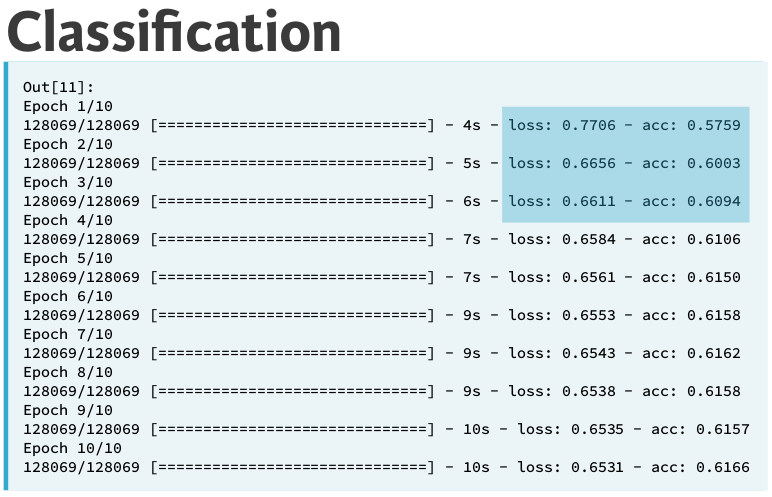

In [49]:
Image(img_path + 'classf.png')

Accuracy improves with first epochs faster and then slowly until a flat region is acheved. 

##EXERCISE
###Understanding your classification data

Now you will start modeling with a new dataset for a classification problem. This data includes information about passengers on the Titanic. You will use predictors such as age, fare and where each passenger embarked from to predict who will survive. 

In [50]:
numeric_titanic_df = pd.read_csv(csv_path + 'titanic_all_numeric.csv')
print(numeric_titanic_df.head(1))

   survived  pclass   age  sibsp  parch  fare  male  age_was_missing  \
0         0       3  22.0      1      0  7.25     1            False   

   embarked_from_cherbourg  embarked_from_queenstown  \
0                        0                         0   

   embarked_from_southampton  
0                          1  


In [51]:
numeric_titanic_df.shape

(891, 11)

In [52]:
predictors = numeric_titanic_df.drop('survived', axis=1).values
n_cols = predictors.shape[1]

You'll now create a classification model using the titanic dataset, which has been pre-loaded into a DataFrame called df. You'll take information about the passengers and predict which ones survived.

The predictive variables are stored in a NumPy array predictors. The target to predict is in df.survived, though you'll have to manipulate it for keras. The number of predictive features is stored in n_cols.

Here, you'll use the 'sgd' optimizer, which stands for Stochastic Gradient Descent. You'll learn more about this in the next chapter!

In [53]:
import keras
from keras.utils import to_categorical

# Convert the target to categorical: target
target = to_categorical(numeric_titanic_df.survived)

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(predictors, target)

Epoch 1/1
891/891 [==============================] - 0s 413us/step - loss: 2.7126 - acc: 0.5836


## Using models
- __Save__ model after trained it 
- __Reload__ that model
- Make __predictions__ with the model 

###Saving, reloading and using your model:

In [54]:
from keras.models import load_model

# models are saved in h5 format 
model.save('model_file.h5')

# load model back into the memory
my_model = load_model('my_model.h5')

# then make predictions
predictions = my_model.predict(data_to_predict_with)

probability_true = predictions[:,1]

my_model.sumamry()
# last command would give something like this:

OSError: Unable to open file (unable to open file: name = 'my_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

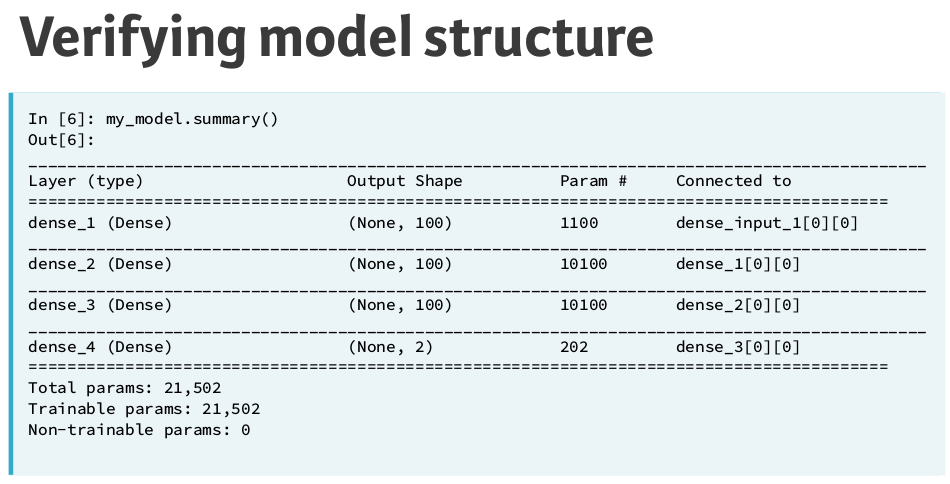

In [55]:
Image(img_path + 'msum.png')

## EXERCISE
###Making predictions

The trained network from your previous coding exercise is now stored as model. New data to make predictions is stored in a NumPy array as pred_data. Use model to make predictions on your new data.

In this exercise, your predictions will be probabilities, which is the most common way for data scientists to communicate their predictions to colleagues.

In [56]:
pred_data = np.array([[2, 34.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [2, 31.0, 1, 1, 26.25, 0, False, 0, 0, 1],
       [1, 11.0, 1, 2, 120.0, 1, False, 0, 0, 1],
       [3, 0.42, 0, 1, 8.5167, 1, False, 1, 0, 0],
       [3, 27.0, 0, 0, 6.975, 1, False, 0, 0, 1],
       [3, 31.0, 0, 0, 7.775, 1, False, 0, 0, 1],
       [1, 39.0, 0, 0, 0.0, 1, False, 0, 0, 1],
       [3, 18.0, 0, 0, 7.775, 0, False, 0, 0, 1],
       [2, 39.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [1, 33.0, 1, 0, 53.1, 0, False, 0, 0, 1],
       [3, 26.0, 0, 0, 7.8875, 1, False, 0, 0, 1],
       [3, 39.0, 0, 0, 24.15, 1, False, 0, 0, 1],
       [2, 35.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [3, 6.0, 4, 2, 31.275, 0, False, 0, 0, 1],
       [3, 30.5, 0, 0, 8.05, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 0.0, 1, True, 0, 0, 1],
       [3, 23.0, 0, 0, 7.925, 0, False, 0, 0, 1],
       [2, 31.0, 1, 1, 37.0042, 1, False, 1, 0, 0],
       [3, 43.0, 0, 0, 6.45, 1, False, 0, 0, 1],
       [3, 10.0, 3, 2, 27.9, 1, False, 0, 0, 1],
       [1, 52.0, 1, 1, 93.5, 0, False, 0, 0, 1],
       [3, 27.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [1, 38.0, 0, 0, 0.0, 1, False, 0, 0, 1],
       [3, 27.0, 0, 1, 12.475, 0, False, 0, 0, 1],
       [3, 2.0, 4, 1, 39.6875, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 6.95, 1, True, 0, 1, 0],
       [3, 29.69911764705882, 0, 0, 56.4958, 1, True, 0, 0, 1],
       [2, 1.0, 0, 2, 37.0042, 1, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.75, 1, True, 0, 1, 0],
       [1, 62.0, 0, 0, 80.0, 0, False, 0, 0, 0],
       [3, 15.0, 1, 0, 14.4542, 0, False, 1, 0, 0],
       [2, 0.83, 1, 1, 18.75, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.2292, 1, True, 1, 0, 0],
       [3, 23.0, 0, 0, 7.8542, 1, False, 0, 0, 1],
       [3, 18.0, 0, 0, 8.3, 1, False, 0, 0, 1],
       [1, 39.0, 1, 1, 83.1583, 0, False, 1, 0, 0],
       [3, 21.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 8.05, 1, True, 0, 0, 1],
       [3, 32.0, 0, 0, 56.4958, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 29.7, 1, True, 1, 0, 0],
       [3, 20.0, 0, 0, 7.925, 1, False, 0, 0, 1],
       [2, 16.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [1, 30.0, 0, 0, 31.0, 0, False, 1, 0, 0],
       [3, 34.5, 0, 0, 6.4375, 1, False, 1, 0, 0],
       [3, 17.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [3, 42.0, 0, 0, 7.55, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 8, 2, 69.55, 1, True, 0, 0, 1],
       [3, 35.0, 0, 0, 7.8958, 1, False, 1, 0, 0],
       [2, 28.0, 0, 1, 33.0, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 1, 0, 89.1042, 0, True, 1, 0, 0],
       [3, 4.0, 4, 2, 31.275, 1, False, 0, 0, 1],
       [3, 74.0, 0, 0, 7.775, 1, False, 0, 0, 1],
       [3, 9.0, 1, 1, 15.2458, 0, False, 1, 0, 0],
       [1, 16.0, 0, 1, 39.4, 0, False, 0, 0, 1],
       [2, 44.0, 1, 0, 26.0, 0, False, 0, 0, 1],
       [3, 18.0, 0, 1, 9.35, 0, False, 0, 0, 1],
       [1, 45.0, 1, 1, 164.8667, 0, False, 0, 0, 1],
       [1, 51.0, 0, 0, 26.55, 1, False, 0, 0, 1],
       [3, 24.0, 0, 3, 19.2583, 0, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.2292, 1, True, 1, 0, 0],
       [3, 41.0, 2, 0, 14.1083, 1, False, 0, 0, 1],
       [2, 21.0, 1, 0, 11.5, 1, False, 0, 0, 1],
       [1, 48.0, 0, 0, 25.9292, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 8, 2, 69.55, 0, True, 0, 0, 1],
       [2, 24.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [2, 42.0, 0, 0, 13.0, 0, False, 0, 0, 1],
       [2, 27.0, 1, 0, 13.8583, 0, False, 1, 0, 0],
       [1, 31.0, 0, 0, 50.4958, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 9.5, 1, True, 0, 0, 1],
       [3, 4.0, 1, 1, 11.1333, 1, False, 0, 0, 1],
       [3, 26.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [1, 47.0, 1, 1, 52.5542, 0, False, 0, 0, 1],
       [1, 33.0, 0, 0, 5.0, 1, False, 0, 0, 1],
       [3, 47.0, 0, 0, 9.0, 1, False, 0, 0, 1],
       [2, 28.0, 1, 0, 24.0, 0, False, 1, 0, 0],
       [3, 15.0, 0, 0, 7.225, 0, False, 1, 0, 0],
       [3, 20.0, 0, 0, 9.8458, 1, False, 0, 0, 1],
       [3, 19.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.8958, 1, True, 0, 0, 1],
       [1, 56.0, 0, 1, 83.1583, 0, False, 1, 0, 0],
       [2, 25.0, 0, 1, 26.0, 0, False, 0, 0, 1],
       [3, 33.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [3, 22.0, 0, 0, 10.5167, 0, False, 0, 0, 1],
       [2, 28.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [3, 25.0, 0, 0, 7.05, 1, False, 0, 0, 1],
       [3, 39.0, 0, 5, 29.125, 0, False, 0, 1, 0],
       [2, 27.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [1, 19.0, 0, 0, 30.0, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 1, 2, 23.45, 0, True, 0, 0, 1],
       [1, 26.0, 0, 0, 30.0, 1, False, 1, 0, 0],
       [3, 32.0, 0, 0, 7.75, 1, False, 0, 1, 0]])

In [72]:
# Specify, compile, and fit the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(predictors, target, epochs=10)

# Calculate predictions: predictions
predictions = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# print predicted_prob_true
print(predicted_prob_true)

Epoch 1/10
891/891 [==============================] - 1s 610us/step - loss: 3.1398 - acc: 0.5522
Epoch 2/10
891/891 [==============================] - 0s 78us/step - loss: 1.6649 - acc: 0.6240
Epoch 3/10
891/891 [==============================] - 0s 86us/step - loss: 0.9739 - acc: 0.6274
Epoch 4/10
891/891 [==============================] - 0s 97us/step - loss: 0.8229 - acc: 0.6476
Epoch 5/10
891/891 [==============================] - 0s 97us/step - loss: 0.8359 - acc: 0.6543
Epoch 6/10
891/891 [==============================] - 0s 81us/step - loss: 0.6032 - acc: 0.6992
Epoch 7/10
891/891 [==============================] - 0s 92us/step - loss: 0.6084 - acc: 0.6880
Epoch 8/10
891/891 [==============================] - 0s 104us/step - loss: 0.6120 - acc: 0.6981
Epoch 9/10
891/891 [==============================] - 0s 88us/step - loss: 0.6145 - acc: 0.6891
Epoch 10/10
891/891 [==============================] - 0s 92us/step - loss: 0.5911 - acc: 0.6902
[0.22232209 0.33601567 0.8388232  0.4

## Understanding model optimization

### Testing Stochastic Gradient Descent

In [69]:
def get_new_model(input_shape = input_shape):
    '''Creates a keras Sequential binary classification model
    with 2 hidden layers'''
    
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    return model

In [ ]:
# learning rates
lr_to_test = [.000001, 0.01, 1]

for lr in lr_to_test:
    model = get_new_model()
    
    my_optimizer = SGD(lr=lr)
    
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    
    model.fit(predictors, target)

## EXERCISE
### Changing optimization parameters

It's time to get your hands dirty with optimization. You'll now try optimizing a model at a very low learning rate, a very high learning rate, and a "just right" learning rate. You'll want to look at the results after running this exercise, remembering that a low value for the loss function is good.

For these exercises, we've pre-loaded the predictors and target values from your previous classification models (predicting who would survive on the Titanic). You'll want the optimization to start from scratch every time you change the learning rate, to give a fair comparison of how each learning rate did in your results. So we have created a function get_new_model() that creates an unoptimized model to optimize.

In [67]:
input_shape = (predictors.shape[1],)

In [74]:
# Import the SGD optimizer
from keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target, epochs=10)



Testing model with learning rate: 0.000001

Epoch 1/10
891/891 [==============================] - 1s 578us/step - loss: 4.9121
Epoch 2/10
891/891 [==============================] - 0s 91us/step - loss: 4.8733
Epoch 3/10
891/891 [==============================] - 0s 76us/step - loss: 4.8340
Epoch 4/10
891/891 [==============================] - 0s 99us/step - loss: 4.7945
Epoch 5/10
891/891 [==============================] - 0s 79us/step - loss: 4.7551
Epoch 6/10
891/891 [==============================] - 0s 79us/step - loss: 4.7155
Epoch 7/10
891/891 [==============================] - 0s 79us/step - loss: 4.6759
Epoch 8/10
891/891 [==============================] - 0s 85us/step - loss: 4.6362
Epoch 9/10
891/891 [==============================] - 0s 86us/step - loss: 4.5963
Epoch 10/10
891/891 [==============================] - 0s 74us/step - loss: 4.5563


Testing model with learning rate: 0.010000

Epoch 1/10
891/891 [==============================] - 1s 578us/step - loss: 1.9133
Epo

### Model validation

Model's performance on training data is not a good indication how the model performs on new data. For this reason we use validation data to test model performance. kares does provide data splitting into train and test like other mashine learning algorithms do:

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(predictors, target, valitation_split=0.3)

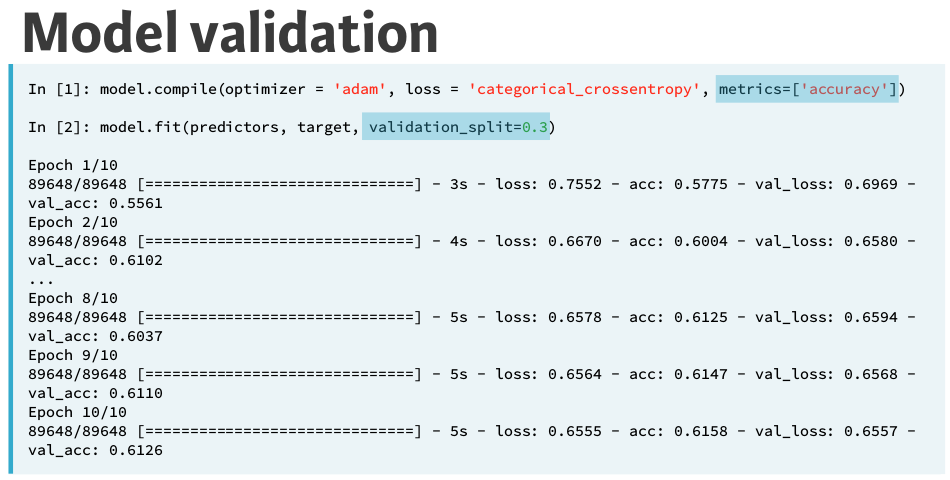

In [77]:
Image(img_path + 'modelval.png')

Our goal is to have the best (as low as) validation loss ass possible. So we should keep training while the loss score decreases and stop when it does not decrease anymore. This can be done with __Early Stopping__.

### Early stopping

In [79]:
from keras.callbacks import EarlyStopping

# patience parameter: how many epochs we can go without improving when we stop the model (2 or 3 are 
# reasonable values 
early_stopping_monitor = EarlyStopping(patience=2)

model.fit(predictors, target, validation_split=0.3, epochs=20, 
          callbacks=[early_stopping_monitor])

Train on 623 samples, validate on 268 samples
Epoch 1/20
623/623 [==============================] - 0s 139us/step - loss: 9.7536 - val_loss: 10.3444
Epoch 2/20
623/623 [==============================] - 0s 117us/step - loss: 9.7536 - val_loss: 10.3444
Epoch 3/20
623/623 [==============================] - 0s 98us/step - loss: 9.7536 - val_loss: 10.3444


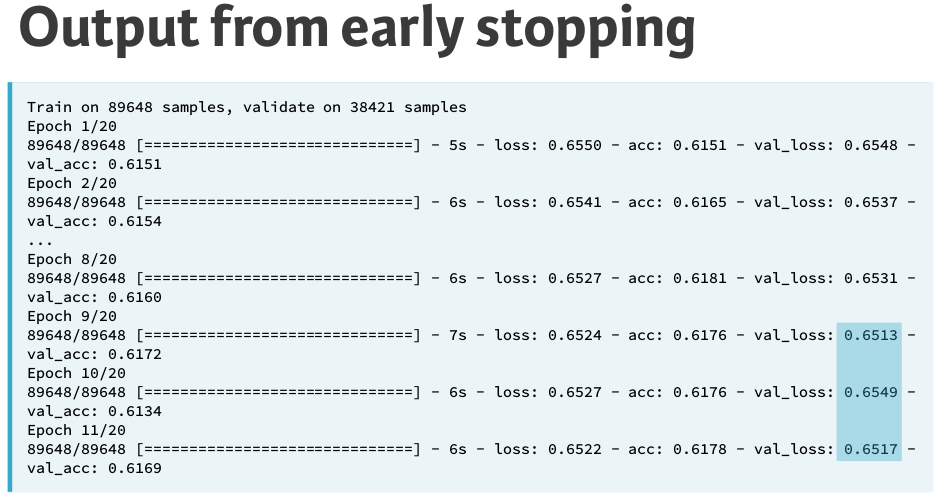

In [80]:
Image(img_path + 'earlyo.png')

## EXERCISE
###Evaluating model accuracy on validation dataset

Now it's your turn to monitor model accuracy with a validation data set. A model definition has been provided as model. Your job is to add the code to compile it and then fit it. You'll check the validation score in each epoch.

In [82]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, validation_split=0.3, epochs=10)

Train on 623 samples, validate on 268 samples
Epoch 1/10
623/623 [==============================] - 1s 2ms/step - loss: 1.0688 - acc: 0.5875 - val_loss: 0.5289 - val_acc: 0.7351
Epoch 2/10
623/623 [==============================] - 0s 163us/step - loss: 0.6161 - acc: 0.6790 - val_loss: 0.5931 - val_acc: 0.6978
Epoch 3/10
623/623 [==============================] - 0s 139us/step - loss: 0.6169 - acc: 0.6742 - val_loss: 0.5857 - val_acc: 0.7201
Epoch 4/10
623/623 [==============================] - 0s 174us/step - loss: 0.5998 - acc: 0.6982 - val_loss: 0.5256 - val_acc: 0.7612
Epoch 5/10
623/623 [==============================] - 0s 159us/step - loss: 0.5881 - acc: 0.6934 - val_loss: 0.5666 - val_acc: 0.7724
Epoch 6/10
623/623 [==============================] - 0s 221us/step - loss: 0.5931 - acc: 0.7079 - val_loss: 0.4847 - val_acc: 0.7687
Epoch 7/10
623/623 [==============================] - 0s 157us/step - loss: 0.5572 - acc: 0.7047 - val_loss: 0.5261 - val_acc: 0.7612
Epoch 8/10
623/623

## EXERCISE 
###Early stopping: Optimizing the optimization

Now that you know how to monitor your model performance throughout optimization, you can use early stopping to stop optimization when it isn't helping any more. Since the optimization stops automatically when it isn't helping, you can also set a high value for epochs in your call to .fit(), as Dan showed in the video.

The model you'll optimize has been specified as model. As before, the data is pre-loaded as predictors and target.

In [83]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors, target, validation_split=0.3, callbacks=[early_stopping_monitor], epochs=30)

Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 1s 2ms/step - loss: 0.8178 - acc: 0.5891 - val_loss: 0.6425 - val_acc: 0.6306
Epoch 2/30
623/623 [==============================] - 0s 145us/step - loss: 0.7401 - acc: 0.6228 - val_loss: 0.6094 - val_acc: 0.7127
Epoch 3/30
623/623 [==============================] - 0s 132us/step - loss: 0.6900 - acc: 0.6726 - val_loss: 0.6538 - val_acc: 0.6493
Epoch 4/30
623/623 [==============================] - 0s 170us/step - loss: 0.6585 - acc: 0.6437 - val_loss: 0.5953 - val_acc: 0.7500
Epoch 5/30
623/623 [==============================] - 0s 179us/step - loss: 0.6100 - acc: 0.6790 - val_loss: 0.5282 - val_acc: 0.7127
Epoch 6/30
623/623 [==============================] - 0s 144us/step - loss: 0.5863 - acc: 0.6886 - val_loss: 0.5455 - val_acc: 0.7127
Epoch 7/30
623/623 [==============================] - 0s 189us/step - loss: 0.5941 - acc: 0.6726 - val_loss: 0.4780 - val_acc: 0.7575
Epoch 8/30
623/623

Because optimization will automatically stop when it is no longer helpful, it is okay to specify the maximum number of epochs as 30 rather than using the default of 10 that you've used so far. Here, it seems like the optimization stopped after 10 epochs.

## EXERCISE
###Experimenting with wider networks
Now you know everything you need to begin experimenting with different models!

A model called model_1 has been pre-loaded. You can see a summary of this model printed in the IPython Shell. This is a relatively small network, with only 10 units in each hidden layer.

In this exercise you'll create a new model called model_2 which is similar to model_1, except it has 100 units in each hidden layer.

After you create model_2, both models will be fitted, and a graph showing both models loss score at each epoch will be shown. We added the argument verbose=False in the fitting commands to print out fewer updates, since you will look at these graphically instead of as text.

In [88]:
sns.set()

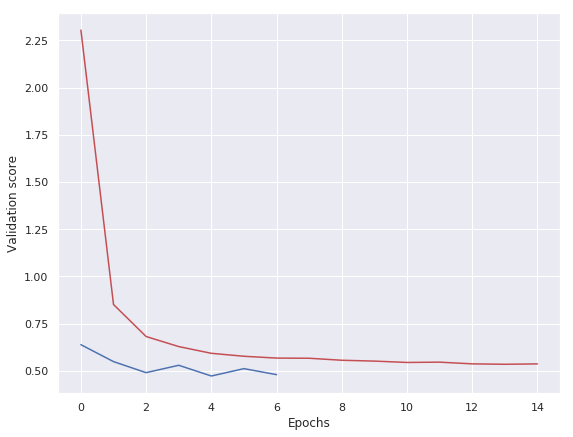

In [89]:
# model 1
model_1 = Sequential()
model_1.add(Dense(10, activation='relu', input_shape=input_shape))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(2, activation='softmax'))
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))
model_2.add(Dense(2, activation='softmax'))
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, 
                               callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, 
                               callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.figure(figsize=[9,7])
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

## EXERCISE
### Adding layers to a network

You've seen how to experiment with wider networks. In this exercise, you'll try a deeper network (more hidden layers).

Once again, you have a baseline model called model_1 as a starting point. It has 1 hidden layer, with 50 units. You can see a summary of that model's structure printed out. You will create a similar network with 3 hidden layers (still keeping 50 units in each layer).

In [92]:
# create model_1
model_1 = Sequential()
model_1.add(Dense(50, activation='relu', input_shape=input_shape))
model_1.add(Dense(2, activation='softmax'))
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_90 (Dense)             (None, 2)                 102       
Total params: 652
Trainable params: 652
Non-trainable params: 0
_________________________________________________________________
None


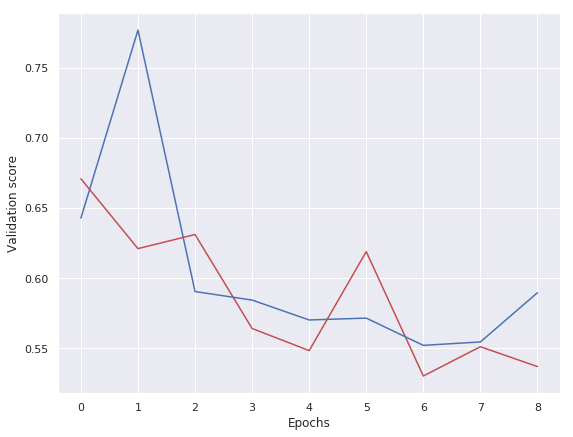

In [93]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.figure(figsize=[9,7])
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

### Model capacity

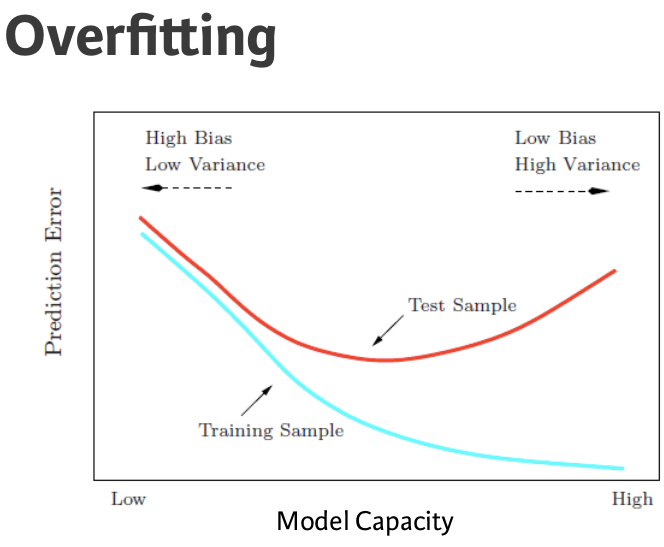

In [95]:
Image(img_path + 'overf.png')

Overfitting is the ability of the model to fit oddities in the training data that are purely due to happenstance and it wont apply to new dataset. When you are overfitting model will make accurate predictions on training data but inaccurate predictions on validation (test) data. Underfitting is when model is incappable to find patterns in the training and test data. Since we want to do well on dataset we didnt use to train our model, our validation score is the ultimate measure of models predictive quality.

Model capacity is models ability to capture predictive patterns in data. The more capacity model have the further right in the graph model is. 

###Workflow for optimizing model capacity
- Start with a small network
- Gradually increase capacity
- Keep increasing capacity until validation score is no longer improving

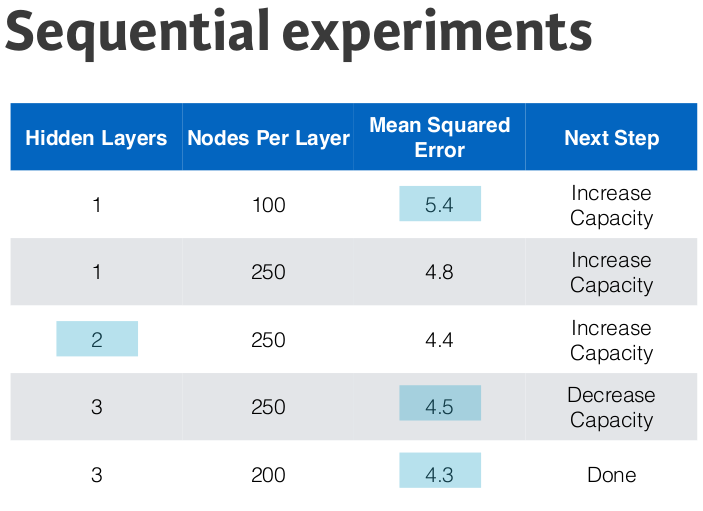

In [96]:
Image(img_path + 'seq.png')

## EXERCISE

In [104]:
mnist_df = pd.read_csv(csv_path + 'mnist.csv', header=None)
mnist_df.shape

(2001, 785)

In [107]:
X = mnist_df.iloc[:,1:].values
y = to_categorical(mnist_df.iloc[:,0])

print('X shape: {}\ny shape: {}'.format(X.shape, y.shape))

X shape: (2001, 784)
y shape: (2001, 10)


###Building your own digit recognition model

You've reached the final exercise of the course - you now know everything you need to build an accurate model to recognize handwritten digits!

We've already done the basic manipulation of the MNIST dataset shown in the video, so you have X and y loaded and ready to model with. Sequential and Dense from keras are also pre-imported.

To add an extra challenge, we've loaded only 2500 images, rather than 60000 which you will see in some published results. Deep learning models perform better with more data, however, they also take longer to train, especially when they start becoming more complex. 

In [111]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(784,)))

# Add the second hidden layer
model.add(Dense(50, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X, y, validation_split=0.3, epochs=15)

Train on 1400 samples, validate on 601 samples
Epoch 1/15
1400/1400 [==============================] - 2s 2ms/step - loss: 10.0840 - acc: 0.3414 - val_loss: 9.4572 - val_acc: 0.3744
Epoch 2/15
1400/1400 [==============================] - 0s 175us/step - loss: 7.3235 - acc: 0.5279 - val_loss: 7.7203 - val_acc: 0.4942
Epoch 3/15
1400/1400 [==============================] - 0s 168us/step - loss: 6.2219 - acc: 0.5971 - val_loss: 6.5592 - val_acc: 0.5691
Epoch 4/15
1400/1400 [==============================] - 0s 178us/step - loss: 6.0651 - acc: 0.6079 - val_loss: 6.5588 - val_acc: 0.5824
Epoch 5/15
1400/1400 [==============================] - 0s 176us/step - loss: 5.6372 - acc: 0.6386 - val_loss: 5.7199 - val_acc: 0.6323
Epoch 6/15
1400/1400 [==============================] - 0s 194us/step - loss: 5.6952 - acc: 0.6329 - val_loss: 7.2217 - val_acc: 0.5324
Epoch 7/15
1400/1400 [==============================] - 0s 172us/step - loss: 5.4170 - acc: 0.6493 - val_loss: 5.5944 - val_acc: 0.6323
Ep

 You've done something pretty amazing. You should see better than 78% accuracy recognizing handwritten digits, even while using a small training set of only 1400 images!